In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Fawad\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [165]:
df= pd.read_excel('full_data.xlsx',index_col=0)

In [166]:
df.columns

Index(['Price'], dtype='object')

In [167]:
#df.index
df = pd.DataFrame(df['Price'].resample('MS').mean(), columns= df.columns)

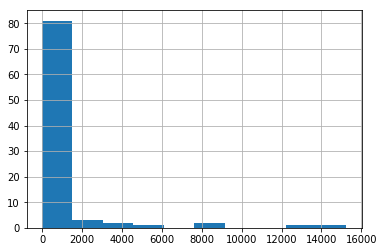

In [120]:
df['Price'].hist()

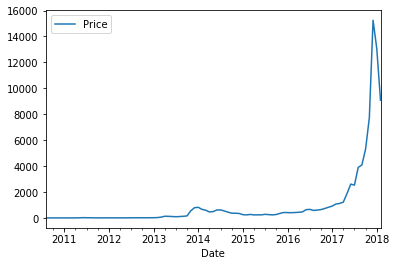

In [121]:
df.plot()

In [122]:
timeseries = df['Price']


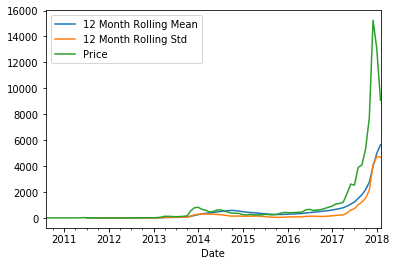

In [123]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

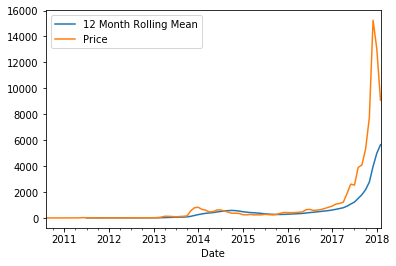

In [124]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

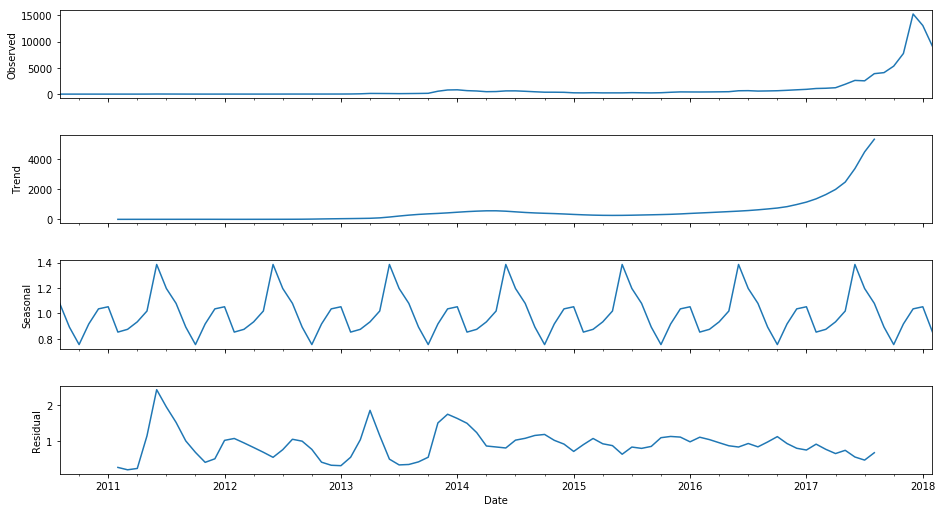

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Price'],model='multiplicative', freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
result = adfuller(df['Price'])

In [128]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 2.15557302404
p-value : 0.998843915162
#Lags Used : 6
Number of Observations Used : 84
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [129]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [130]:
#Differencing

df['First Difference'] = df['Price'] - df['Price'].shift(1)

In [131]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : 5.61574478833
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 84
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


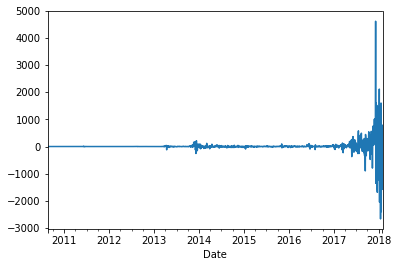

In [26]:
df['First Difference'].plot()

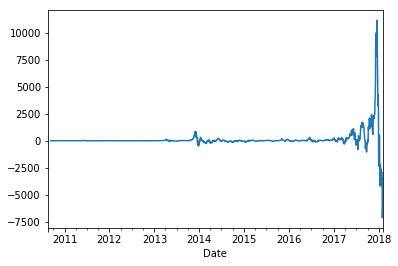

In [28]:
df['Seasonal Difference'] = df['Price'] - df['Price'].shift(12)
df['Seasonal Difference'].plot()

In [29]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.03017051835
p-value : 6.21479681953e-10
#Lags Used : 24
Number of Observations Used : 1326
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

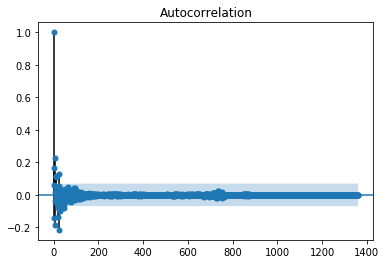

In [31]:
#figure= fig_size(12,8)
figure = plot_acf(df["First Difference"].dropna())

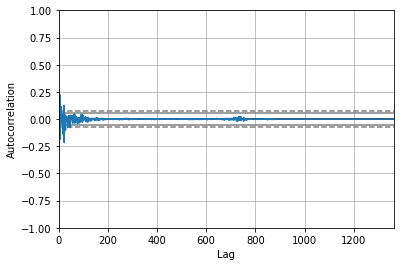

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['First Difference'].dropna())

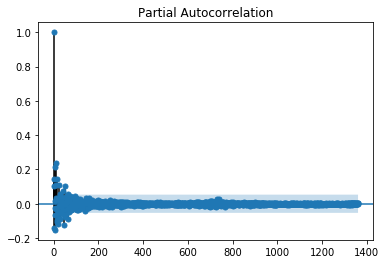

In [33]:
result = plot_pacf(df["First Difference"].dropna())

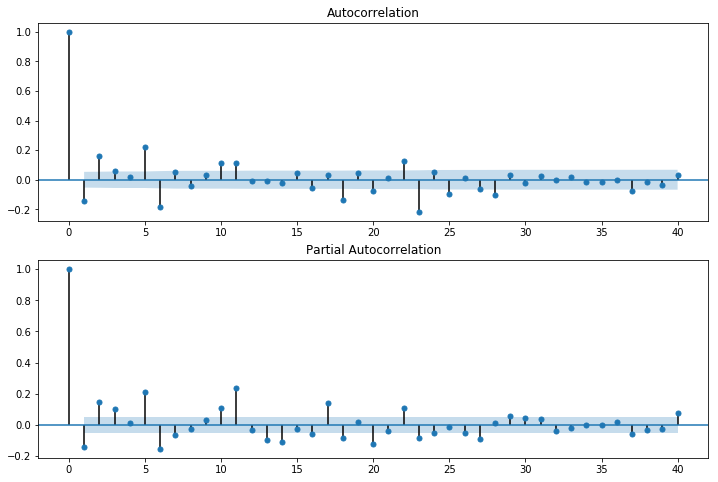

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].iloc[13:], lags=40, ax=ax2)

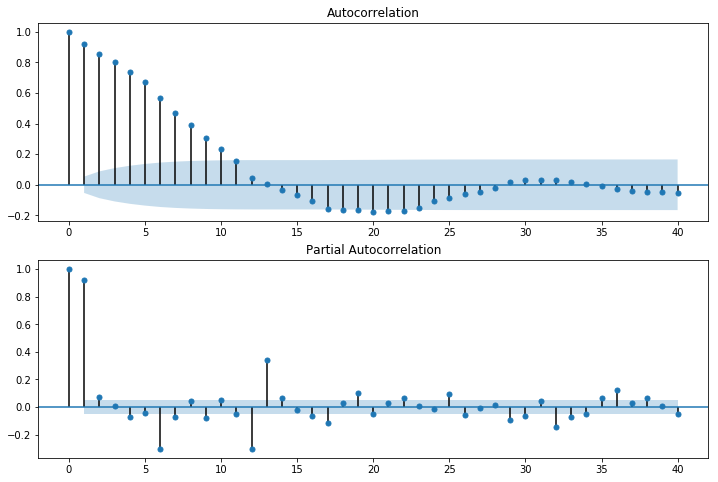

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Difference'].iloc[13:], lags=40, ax=ax2)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [169]:
model = sm.tsa.statespace.SARIMAX(df['Price'],order=(2,2,0), seasonal_order=(2,1,1,12))
results = model.fit()
print(results.summary())

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

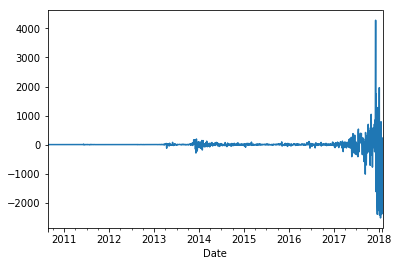

In [38]:
results.resid.plot()

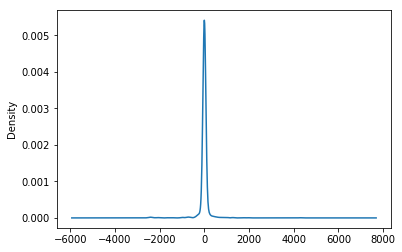

In [39]:
results.resid.plot(kind='kde')

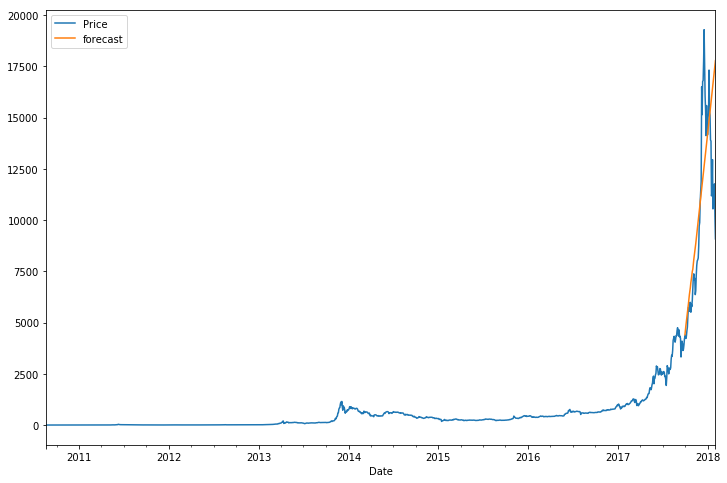

In [76]:


df['forecast'] = results.predict(start = 1300, end= 1363, dynamic= True)  
df[['Price','forecast']].plot(figsize=(12,8))

In [164]:
df.tail(50)

,Price,First Difference,forecast
Date,,,
2014-01-01,820.232500,NaN,NaN
2014-02-01,661.645000,NaN,NaN
2014-03-01,594.848667,NaN,NaN
2014-04-01,461.136667,NaN,NaN
2014-05-01,487.944375,NaN,NaN
2014-06-01,611.289333,NaN,NaN
2014-07-01,618.258667,NaN,NaN
2014-08-01,537.043750,NaN,NaN
2014-09-01,444.716667,NaN,NaN


In [67]:
p=d=q= range(0,3)


In [68]:
import warnings
import itertools
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#print
print('Exmaples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX : {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX : {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX : {} x {}'.format(pdq[2], seasonal_pdq[3]))


warnings.filterwarnings("ignore") # specify to ignore warning messages



Exmaples of parameter combinations for Seasonal ARIMA...
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 0, 2, 12)
SARIMAX : (0, 1, 0) x (0, 1, 0, 12)


In [69]:
pdq = list(itertools.product(p, d, q))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Price'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        
print(results.aic)



ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:23600.83505889262
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:22673.107350808004
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:22086.89518748115
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:21873.09605327335
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:21920.54819394806
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:21734.605188749592
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:22282.91790718293
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:22168.08284897948
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:21830.462435242043
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:22104.11288603473
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:22062.190730831342
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:21862.752518074816
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:22421.527482119887
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:21922.52242629554
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:21704.736176885366
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:22098.669610697754
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:22080.245669421573
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:21772.0784593929
AR

ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:18505.8482829723
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:18469.40754813922
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:18453.648062652337
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:18369.780540224463
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:18330.715127801395
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:18735.154259879175
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:18346.323181807864
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:18237.666379232112
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:19781.730393324928
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:19523.514996873513
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:19611.002908152594
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:19339.778915397714
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:20299.88730204112
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:19289.554031056858
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:19792.430463468292
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:19749.009246623154
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:19490.29864982509
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:19651.0903332416

ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:18241.34564980501
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:18657.670407473837
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:18634.04425420619
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:18482.23194498549
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:18764.769992687452
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:18498.779877007008
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:18345.58291029717
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:19257.047931872938
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:18632.02712377969
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:18237.524403324907
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:18505.86521041282
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:18507.86402572511
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:18484.22978609454
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:18442.398175750466
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:18369.923502554273
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:18343.763820554446
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:18735.91953740162
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:18333.821799617872
A

ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:18417.886951679902
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:18360.059076090754
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:18346.9679228834
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:18636.132412498788
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:18306.249008280516
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:18234.410405272774
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:18781.42791828395
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:18629.377941132672
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:18471.10136046048
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:19367.158144867473
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:18493.45836467986
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:18334.74168048726
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:20545.374985995695
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:19095.88632990715
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:18252.06418578353
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:18655.0247809394
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:18631.272936501206
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:18472.925190459475
AR

ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:19078.327579113455
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:18219.81030633238
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:18612.1838260425
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:18614.1828051873
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:18459.94759099549
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:18661.49199803271
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:18499.903189017663
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:18322.90024336122
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:19171.579606595114
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:18554.7103113398
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:18240.176381776037
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:18458.46853915285
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:18460.372377374013
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:18461.8424207888
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:18398.385812986777
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:18345.263372878162
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:18324.634492732053
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:18633.365444231164
ARIMA

In [78]:
# (2,2,2), (2,2,1,12)



In [79]:
from pandas.tseries.offsets import DateOffset

In [114]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [115]:
future_dates

[Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00')]

In [111]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [116]:
future_df = pd.concat([df,future_dates_df])

In [117]:
future_df.head()

,Price
2010-08-01,0.067784
2010-09-01,0.070070
2010-10-01,0.116827
2010-11-01,0.278901
2010-12-01,0.252033


In [132]:
from pyramid.arima import auto_arima

In [137]:
rs_fit = auto_arima(df['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=True, random=True, random_state=42)  # we can fit a random search (not exhaustive)

rs_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1310.901, BIC=1320.944, Fit time=0.358 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1309.246, BIC=1316.778, Fit time=0.079 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -651.623
Date:                            Thu, 08 Feb 2018   AIC                           1309.246
Time:                                    17:17:47   BIC                           1316.778
Sample:                                         0   HQIC                          1312.284
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     75.0063    215.105      0.349      0.727    -346.591     496.604
ma.L1          0.3163      0.038      8.430      0.000       0.243       0.390
sigma2      1.134e+06   6.01e+04     18.883      0.000    1.02e+06    1.25e+06
===================================================================================
Ljung-Box (Q):                        7.14   Jarque-Bera (JB):              2388.42
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):            1014.84   Skew:                             2.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
model = sm.tsa.statespace.SARIMAX(df['Price'],order=(0,1,1), seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Price   No. Observations:                   91
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -651.690
Date:                            Thu, 08 Feb 2018   AIC                           1307.380
Time:                                    17:18:50   BIC                           1312.401
Sample:                                08-01-2010   HQIC                          1309.406
                                     - 02-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3203      0.030     10.564      0.000       0.261       0.380
sigma2      1.058e+06   4.44e+04   

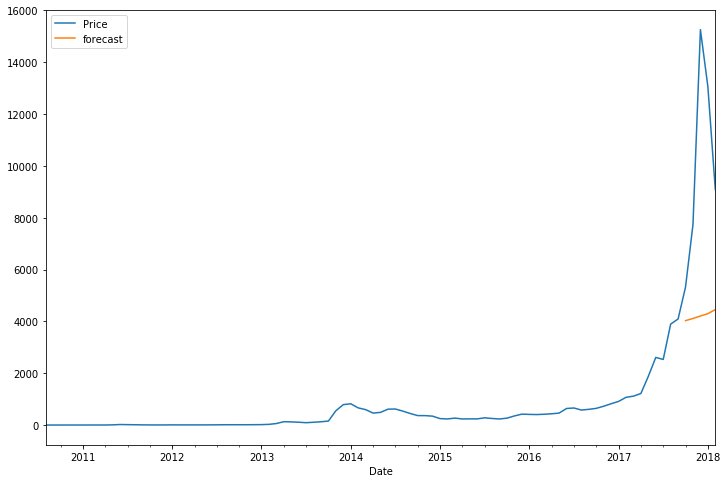

In [142]:
df['forecast'] = results.predict(start = '2017-10-01', end= '2018-02-01', dynamic= True)  
df[['Price','forecast']].plot(figsize=(12,8))

In [143]:
df.tail()

,Price,First Difference,forecast
Date,,,
2017-10-01,5327.223740,1235.997610,4027.933606
2017-11-01,7734.202065,2406.978325,4110.755593
2017-12-01,15251.930614,7517.728549,4206.098927
2018-01-01,13060.411333,-2191.519280,4295.651771
2018-02-01,9083.258333,-3977.153000,4453.530959


In [144]:
from fbprophet import Prophet

In [155]:
dat= pd.read_excel('full_data.xlsx', index_col=[0])

In [156]:
dat = pd.DataFrame(dat['Price'].resample('MS').mean(), columns= dat.columns)

In [157]:
dat.head()

,Price
Date,
2010-08-01,0.067784
2010-09-01,0.070070
2010-10-01,0.116827
2010-11-01,0.278901
2010-12-01,0.252033


In [159]:
dat = dat.reset_index

In [162]:
dat

<bound method DataFrame.reset_index of                    Price
Date                    
2010-08-01      0.067784
2010-09-01      0.070070
2010-10-01      0.116827
2010-11-01      0.278901
2010-12-01      0.252033
2011-01-01      0.380674
2011-02-01      0.973034
2011-03-01      0.878941
2011-04-01      1.205931
2011-05-01      6.624601
2011-06-01     19.929334
2011-07-01     14.723443
2011-08-01     11.080165
2011-09-01      6.377279
2011-10-01      3.853080
2011-11-01      2.826581
2011-12-01      3.622459
2012-01-01      6.489015
2012-02-01      5.292801
2012-03-01      5.005681
2012-04-01      5.047477
2012-05-01      5.117303
2012-06-01      6.125185
2012-07-01      8.067656
2012-08-01     11.463715
2012-09-01     11.741808
2012-10-01     11.949317
2012-11-01     11.586065
2012-12-01     13.468677
2013-01-01     15.755539
...                  ...
2015-09-01    233.275333
2015-10-01    265.660625
2015-11-01    351.130000
2015-12-01    420.163333
2016-01-01    410.049375
2016-02-01 